# Fraud Detection Explorotary Data Analysis of the Dataset



In [2]:
# Import of all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import of Dataset

Import of the datasets into Panda dataframe
Initial Visualizzation 



In [3]:
# Import of the train and test datasets into the Panda dataframe

cc_test_df = pd.read_csv("./DATA/creditcard_test.csv")
cc_train_df = pd.read_csv("./DATA/creditcard_train.csv")

cc_test_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,71852.0,-0.584007,0.880079,1.320090,0.001509,0.292260,-0.990634,1.120755,-0.166826,-0.501695,...,0.167209,0.361133,-0.125141,0.375231,0.029598,-0.559438,0.102098,0.144502,42.81,0
1,48336.0,1.326714,-0.823441,-0.127404,-0.979830,-0.625116,-0.104941,-0.636415,0.050208,-0.785860,...,0.109578,-0.011447,-0.212676,-0.859332,0.507870,-0.199817,-0.021529,0.003230,75.00,0
2,166298.0,2.097691,-0.076097,-1.743719,-0.011746,0.597501,-0.332470,0.130716,-0.174237,0.383371,...,0.233496,0.825427,-0.143247,-1.115397,0.374189,-0.056085,-0.020643,-0.079921,2.29,0
3,40650.0,-1.593912,2.215525,0.210067,-0.236255,-0.002224,-0.058601,-0.392776,-2.005520,-0.306309,...,1.995801,-1.554302,0.261539,-0.531345,0.124584,0.146124,0.346683,0.104860,8.99,0
4,121428.0,1.863194,0.265005,-0.261564,3.853830,0.220877,0.773558,-0.296455,0.207090,-0.487512,...,0.118870,0.611417,0.034731,-0.387779,0.103574,0.140670,-0.003506,-0.061238,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,116793.0,-0.753070,1.600625,-1.694466,-1.448546,1.130943,-0.976420,1.167232,0.201294,-0.245013,...,0.202703,0.725051,-0.303092,-1.016408,-0.107503,0.146474,0.469657,0.304103,0.75,0
85439,57942.0,-0.539994,0.515511,2.029197,0.514863,-0.043655,-0.275000,0.851781,-0.059080,0.319422,...,0.059047,0.441880,-0.048056,0.574042,-0.252453,-0.545212,-0.007875,-0.067811,40.00,0
85440,53165.0,-1.833594,-1.015652,1.217378,-1.464593,-0.448623,-0.955303,-0.496368,0.481275,-1.151529,...,0.363656,0.279139,0.166895,-0.118669,-0.005576,-0.438610,0.209083,-0.049870,140.00,0
85441,166438.0,1.373911,-0.999031,-1.694373,1.057884,-0.413288,-1.033805,0.412863,-0.382925,0.640802,...,0.470784,0.868639,-0.348918,0.059266,0.041987,0.580518,-0.086933,0.025684,343.39,0


In [8]:
# Functiona to create a list to be used as ID for the data frame 
def id_create(df):
    id = []
    for i in range(df.shape[0]):
        id.append(i+1)
    return id

# For test data frame created a 
id_test = id_create(cc_test_df)
cc_test_df["Id"] = id_test
cc_test_df.set_index("Id", inplace=True)

cc_test_df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Id,,,,,,,,,,,,,,,,,,,,,
1,71852.0,-0.584007,0.880079,1.320090,0.001509,0.292260,-0.990634,1.120755,-0.166826,-0.501695,...,0.167209,0.361133,-0.125141,0.375231,0.029598,-0.559438,0.102098,0.144502,42.81,0
2,48336.0,1.326714,-0.823441,-0.127404,-0.979830,-0.625116,-0.104941,-0.636415,0.050208,-0.785860,...,0.109578,-0.011447,-0.212676,-0.859332,0.507870,-0.199817,-0.021529,0.003230,75.00,0
3,166298.0,2.097691,-0.076097,-1.743719,-0.011746,0.597501,-0.332470,0.130716,-0.174237,0.383371,...,0.233496,0.825427,-0.143247,-1.115397,0.374189,-0.056085,-0.020643,-0.079921,2.29,0
4,40650.0,-1.593912,2.215525,0.210067,-0.236255,-0.002224,-0.058601,-0.392776,-2.005520,-0.306309,...,1.995801,-1.554302,0.261539,-0.531345,0.124584,0.146124,0.346683,0.104860,8.99,0
5,121428.0,1.863194,0.265005,-0.261564,3.853830,0.220877,0.773558,-0.296455,0.207090,-0.487512,...,0.118870,0.611417,0.034731,-0.387779,0.103574,0.140670,-0.003506,-0.061238,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85439,116793.0,-0.753070,1.600625,-1.694466,-1.448546,1.130943,-0.976420,1.167232,0.201294,-0.245013,...,0.202703,0.725051,-0.303092,-1.016408,-0.107503,0.146474,0.469657,0.304103,0.75,0
85440,57942.0,-0.539994,0.515511,2.029197,0.514863,-0.043655,-0.275000,0.851781,-0.059080,0.319422,...,0.059047,0.441880,-0.048056,0.574042,-0.252453,-0.545212,-0.007875,-0.067811,40.00,0
85441,53165.0,-1.833594,-1.015652,1.217378,-1.464593,-0.448623,-0.955303,-0.496368,0.481275,-1.151529,...,0.363656,0.279139,0.166895,-0.118669,-0.005576,-0.438610,0.209083,-0.049870,140.00,0


In [21]:
cc_train_df["V1"].head(100)

Time
33419.0    -2.178201
151317.0    2.064423
132434.0   -0.547505
81787.0    -0.945710
125062.0    1.898722
              ...   
39295.0     1.070397
142182.0    0.151315
125621.0    1.796289
127715.0    2.075255
138359.0    1.686160
Name: V1, Length: 100, dtype: float64

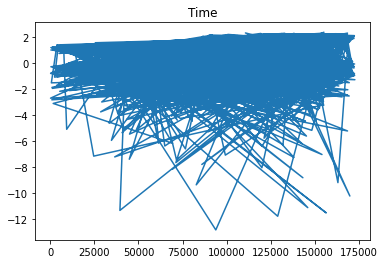

In [22]:
fig = plt.figure()
plt.plot(cc_train_df["V1"].head(2000))
plt.title("Time")
fig.show()

In [8]:
# Changed the index to the time stamp of the 

cc_test_df.set_index("Time", inplace=True)
cc_train_df.set_index("Time", inplace=True)
cc_train_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
33419.0,-2.178201,-3.132187,1.315758,-0.129783,-2.736013,0.743459,-0.752718,-2.650826,-0.184284,-1.392226,...,-0.828762,-0.219136,-1.004913,0.788588,1.061994,-0.319407,-0.132313,0.333476,937.75,0
151317.0,2.064423,0.185575,-1.684612,0.411066,0.479555,-0.797963,0.205544,-0.240568,0.415454,-0.401418,...,-0.351331,-0.876025,0.343288,0.522189,-0.259568,0.173623,-0.056280,-0.029665,1.98,0
132434.0,-0.547505,0.798072,-0.719939,-1.129561,0.925708,0.763338,0.231338,0.799204,-0.277812,-0.348452,...,0.366664,1.068933,-0.101523,-1.604148,-0.318277,0.838076,0.012324,-0.015564,11.95,0
81787.0,-0.945710,0.323579,0.595681,-1.288095,0.818906,-0.748491,0.890076,-0.130671,-0.471365,-0.389743,...,-0.371528,-1.149510,0.217859,-0.507989,-0.026857,0.591496,-0.326179,-0.007543,24.98,0
125062.0,1.898722,-0.321038,-1.771837,0.672408,0.115019,-1.267347,0.612810,-0.441070,0.450298,0.107004,...,0.015111,0.006269,-0.029094,-0.071333,0.179444,0.378225,-0.106042,-0.059506,104.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140177.0,2.164466,-1.721358,0.118546,-1.363516,-2.147961,-0.486731,-1.755439,-0.023992,-0.563216,1.457773,...,-0.123266,0.138772,0.319598,0.018634,-0.560967,-0.251774,0.060706,-0.023599,48.00,0
71541.0,1.070134,0.181228,0.670405,1.351215,-0.617646,-1.019820,0.203157,-0.194571,-0.043719,-0.006449,...,-0.260380,-0.931052,0.149692,0.647047,0.204529,-0.739666,0.012326,0.046917,70.00,0
128249.0,2.111207,-0.687175,-1.637544,-1.931276,-0.244434,-1.065946,-0.062955,-0.269111,2.439795,-1.334028,...,0.115593,0.742015,-0.011124,0.731225,0.455436,-0.671152,0.039939,-0.051133,7.99,0
